In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Data accessing

In [3]:
df= pd.read_csv("C:/Users/Oseni Toheeb/Desktop/python/customer Chun Analysis and Prediction Using Machine Learning/customer-Chun-Analysis-and-Prediction-Using-Machine-Learning/customer-churn-prediction-2020/train.csv")

In [4]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# Data Cleaning

In [5]:
df.drop(columns=["state","area_code"], inplace=True)

In [6]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


# Data Exploration

In [7]:
c=df.total_night_charge
c

0       11.45
1        7.32
2        8.86
3        8.41
4        9.57
        ...  
4245     9.62
4246     8.38
4247     5.81
4248    13.39
4249     6.97
Name: total_night_charge, Length: 4250, dtype: float64

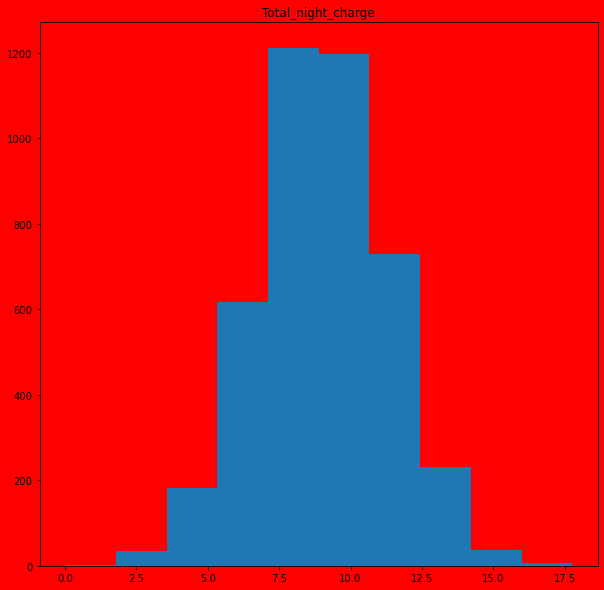

In [8]:
fig, bx=plt.subplots(facecolor="red", figsize=(10,10))
bx.set_facecolor("red")
bx.hist(c.values)
plt.title('Total_night_charge')
plt.show()


<AxesSubplot:ylabel='Density'>

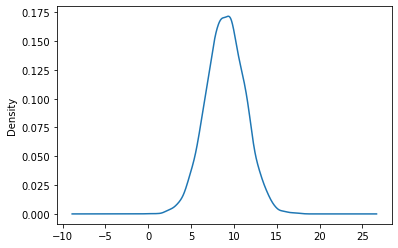

In [9]:
c.plot(kind='density')

In [10]:
X=df.iloc[:, :17]

In [11]:
y=df["churn"]

In [12]:
X=pd.get_dummies(X, columns=['international_plan', 'voice_mail_plan'])

In [13]:
dd= {"yes":1, "no":0}

y=y.map(dd)


In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64

In [15]:
X.select_dtypes(include="object")

""
0
1
2
3
4
...
4245
4246
4247
4248


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_val, y_train, y_val= train_test_split(X,y,test_size=.2, random_state=42)

In [18]:
from sklearn.svm import SVC

In [19]:
mymodel = SVC()

In [20]:
mymodel.fit(x_train,y_train)

SVC()

In [21]:
pre=mymodel.predict(x_val)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pre)


array([[721,   0],
       [127,   2]], dtype=int64)

In [23]:
y_val.value_counts()

0    721
1    129
Name: churn, dtype: int64

In [24]:
y_val.value_counts()

0    721
1    129
Name: churn, dtype: int64

In [25]:
d=pd.read_csv("C:/Users/Oseni Toheeb/Desktop/python/customer Chun Analysis and Prediction Using Machine Learning/customer-Chun-Analysis-and-Prediction-Using-Machine-Learning/customer-churn-prediction-2020/test.csv")

In [26]:
d.drop(columns=["state","area_code"], inplace=True)

o=pd.get_dummies(d, columns=['international_plan', 'voice_mail_plan'])

In [27]:
o

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,2,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,1,0
2,3,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1,0,1,0
3,4,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1,0,1,0
4,5,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,1,0,1,0
746,747,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,1,0,1,0
747,748,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1,0,1,0
748,749,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,1,0,1,0


In [28]:
o.drop(columns=["id"], inplace=True)

In [29]:
pre=mymodel.predict(o)

In [30]:
f=pd.DataFrame(pre, columns=["churn"])
f["id"]=f.index


In [31]:
dd= {0:"no", 1:"yes"}

y=f.churn.map(dd)


In [32]:
c=y.to_frame("Churn")

In [33]:
C=c.reset_index()

In [34]:
C.rename(columns={"index":"id"}, inplace=True)

In [35]:
C.to_csv("Churn.csv", index_label=False)

In [36]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


# Perform oversampling to the dATASET

In [38]:
df.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [40]:
majority_df=df.loc[df["churn"]=="no", :]
minority_df=df.loc[df["churn"]=="ye", :]

In [ ]:
from sklearn.utils import resample

